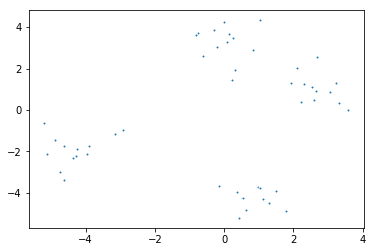

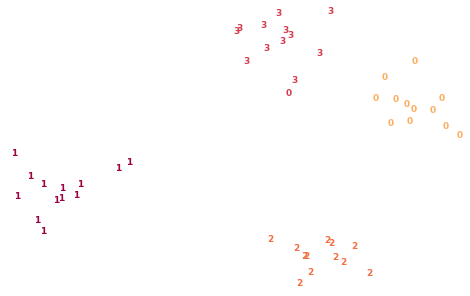

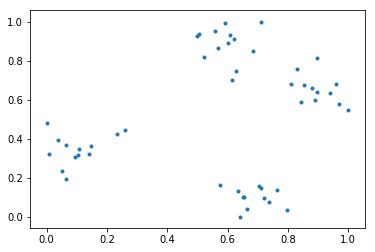

X is: 
 [[0.60799834 0.93251809]
 [0.25814397 0.44433328]
 [0.59223619 0.99192356]
 [0.65165947 0.10033124]
 [0.66454299 0.04005605]]

 Y is: 
 [3 1 3 2 2]
Distance Matrix: 
 [[0.60060178 0.061461   0.83333141 ... 0.38485422 0.91595448 0.84268193]
 [0.         0.6414614  0.52267758 ... 0.65796905 0.67529731 0.57726137]
 [0.6414614  0.         0.89357036 ... 0.43912851 0.97733592 0.90368309]
 ...
 [0.65796905 0.43912851 0.60437858 ... 0.         0.62952454 0.5851844 ]
 [0.67529731 0.97733592 0.15805088 ... 0.62952454 0.         0.09806926]
 [0.57726137 0.90368309 0.06780469 ... 0.5851844  0.09806926 0.        ]]


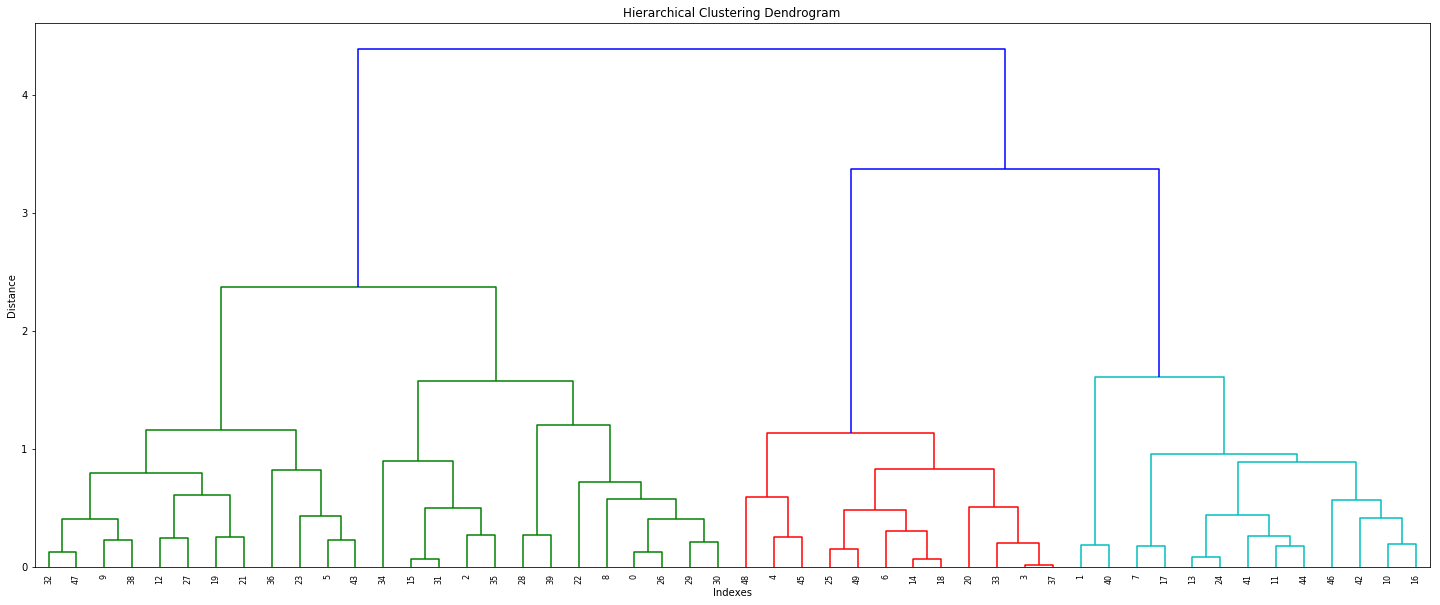

In [2]:
%matplotlib inline
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_blobs
from scipy.spatial import distance_matrix

# Create a random seed and set it to 0
np.random.seed(0)

# Make random clusters using blobs
X, y = make_blobs(n_samples=50, centers=[[2, 1], [-4, -2], [1, -4], [0, 3]], cluster_std=0.7)

# Scatter plot the data to check
plt.scatter(X[:, 0], X[:, 1], marker='.', edgecolors='white')
plt.show()

""" Agglomerative Clustering-
n_clusters is number of clusters to form and number of centroids to generate
linkage sets which distance to use between sets of observations
"""
agglom = AgglomerativeClustering(n_clusters=4, linkage='average')

# Fit the model with X and y from generated data
agglom.fit(X, y)

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(8, 5))

# Scale the data points down or else the data points will be scattered very far apart.
# Create a minimum and maximum range of X.
x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)

# Get the average distance for X.
X = (X - x_min) / (x_max - x_min)

# Display all of the datapoints.
for i in range(X.shape[0]):
    # Replace the data points with their respective cluster value
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X[i, 0], X[i, 1], str(y[i]),
             color=plt.get_cmap('Spectral')(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
plt.axis('off')

# Display the plot
plt.show()

# Display the plot of the original data before clustering
plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.show()


# Dendrogram Associated for the Agglomerative Hierarchical Clustering
# Distance Matrix or Proximity Matrix of points
print("X is: \n",X[:5])
print('\n Y is: \n', y[:5])

dist_matrix = distance_matrix(X[0:], X[1:])
print('Distance Matrix: \n', dist_matrix)

# Choose any linkage criterion
Z = hierarchy.linkage(dist_matrix, 'complete')

# Plot the dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Indexes')
plt.ylabel('Distance')

dendrogram = hierarchy.dendrogram(Z,
                                  leaf_rotation=90.,
                                  leaf_font_size=8
                                  )
plt.show()